In [1]:
import numpy as np
import math

In [2]:
data_points = np.array([[3.600, 79], [1.800, 54], [2.283, 62], [3.333, 74], [2.883, 55], 
               [4.533, 85],[1.950,51], [1.833,54], [4.700,88], [3.600, 85], [1.600, 52], [4.350,85],[3.917,84], 
               [4.200,78], [1.750,62], [1.800,51], [4.700,83], [2.167, 52],[4.800, 84], [1.750, 47]])

In [3]:
print(len(data_points))
print(type(data_points))

20
<class 'numpy.ndarray'>


In [47]:
def EuclideanDistance(x, y): 
    S = 0; #  The sum of the squared differences of the elements 
    for i in range(len(x)): 
        S += math.pow(x[i]-y[i], 2); 
    return S
  
    return math.sqrt(S); #The square root of the sum 
def k_mean(k, data_points, iterations):
    #initialize
    # let a1...am be the min of the mth component, where m is the length of a coord. Ex, here m = 2
    # let A1..Am be the max of the mth component
    a = []
    A = []
    m = len(data_points[0])
    for i in range(m): # get the length of each vector
        min_v = data_points[0][i]
        max_v = data_points[0][i]
        for j in range(len(data_points)):
            if min_v > data_points[j][i]:
                min_v = data_points[j][i]
            elif max_v < data_points[j][i]:
                max_v = data_points[j][i]
        a.append(min_v)
        A.append(max_v)
    print("min: ", a)
    print("Max: ", A)
    a_tilt = []
    for i in range(m):
        a_tilt.append( (A[i] - a[i]) / (k + 1) )
    print("a_tilt: ", a_tilt)
    centroids = []
    l = 1
    while l <= k:
        centroid = []
        for i in range(m):
            centroid.append(a[i] + l * a_tilt[i])
        centroids.append(centroid) # append k times so we will have k centroids/clusters
        l += 1
    print("centroids:", centroids)
    
    it = 0
    clusters = [[] for i in range(k)]
    while(it < iterations):
        for point in data_points:
            min_dis = math.inf
            min_dis_index = 0
            for centroid_index in range(len(centroids)):
                dis = EuclideanDistance(point, centroids[centroid_index])
                if min_dis > dis:
                    min_dis = dis
                    min_dis_index = centroid_index # assign the current point into this centroid/cluster
            clusters[min_dis_index].append(point)
        it += 1  
    print("returning clusters....")        
    return clusters           

In [48]:
result = k_mean(2, data_points, 1)

min:  [1.6, 47.0]
Max:  [4.8, 88.0]
a_tilt:  [1.0666666666666667, 13.666666666666666]
centroids: [[2.666666666666667, 60.666666666666664], [3.7333333333333334, 74.33333333333333]]
returning clusters....


In [49]:
print(np.array(result))

[[[ 1.8   54.   ]
  [ 2.283 62.   ]
  [ 2.883 55.   ]
  [ 1.95  51.   ]
  [ 1.833 54.   ]
  [ 1.6   52.   ]
  [ 1.75  62.   ]
  [ 1.8   51.   ]
  [ 2.167 52.   ]
  [ 1.75  47.   ]]

 [[ 3.6   79.   ]
  [ 3.333 74.   ]
  [ 4.533 85.   ]
  [ 4.7   88.   ]
  [ 3.6   85.   ]
  [ 4.35  85.   ]
  [ 3.917 84.   ]
  [ 4.2   78.   ]
  [ 4.7   83.   ]
  [ 4.8   84.   ]]]


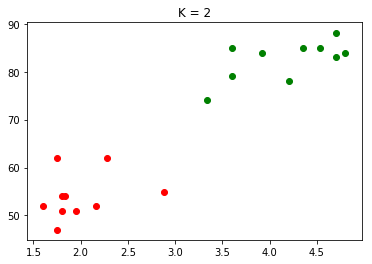

In [50]:
import numpy as np
import matplotlib.pyplot as plt

x, y = np.array(result[0]).T
plt.scatter(x, y, color='red')
x1, y1 = np.array(result[1]).T
plt.scatter(x1, y1, color='green')
plt.title("K = 2")
plt.show()

In [51]:
result2 = k_mean(3, data_points, 1)

min:  [1.6, 47.0]
Max:  [4.8, 88.0]
a_tilt:  [0.7999999999999999, 10.25]
centroids: [[2.4, 57.25], [3.2, 67.5], [4.0, 77.75]]
returning clusters....


In [52]:
print(result2[1])

[]


# We can see one of the cluster has no elements below

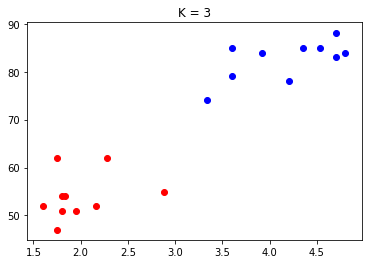

In [53]:
if len(result2[0]) != 0:
    x2, y2 = np.array(result2[0]).T
    plt.scatter(x2, y2, color='red')
if len(result2[1]) != 0:
    x3, y3 = np.array(result2[1]).T
    plt.scatter(x3, y3, color='green')
if len(result2[2]) != 0:
    x4, y4 = np.array(result2[2]).T
    plt.scatter(x4, y4, color='blue')
plt.title("K = 3")
plt.show()